In [9]:
 # data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

 # visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv('train_longevity.csv')
test_df = pd.read_csv('test_longevity.csv')
combine = [train_df, test_df]

In [4]:
print(train_df.columns.values)
#['Id' 'Longevity' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region' 'Activity' 'MedExam' 'Sport']

['Id' 'Longevity' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region'
 'Activity' 'MedExam' 'Sport']


['IdLongevityEducationSexAgePetChildrenRegionActivityMedExamSport']

In [5]:
print(test_df.columns.values)
#['Id' 'Education' 'Sex' 'Age' 'Activity' 'Sport' 'IsAlone' 'Age*Education']

['Id' 'Education' 'Sex' 'Age' 'Pet' 'Children' 'Region' 'Activity'
 'MedExam' 'Sport' 'Longevity']


In [8]:
train_df.shape      # мы увидим информацию о размерности нашего датафрейма 


(857, 11)

In [10]:
train_df.head()         # показывает первые 10 значений датасета
  

,Id,Longevity,Education,Sex,Age,Pet,Children,Region,Activity,MedExam,Sport
0,1,0,3,female,73,1,0,21,725,NaN,NaN
1,2,1,1,male,75,1,0,17,7128,+,+
2,3,1,3,male,73,0,0,31,793,NaN,NaN
3,4,1,1,male,74,1,0,11,5310,+,NaN
4,5,0,3,female,74,0,0,37,805,NaN,NaN


In [11]:
train_df.describe()     # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max 

,Id,Longevity,Education,Pet,Children,Activity
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,429.000000,0.383897,2.309218,0.525088,0.378063,3267.183197
std,247.538886,0.486617,0.836560,1.089302,0.793893,5048.489704
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,215.000000,0.000000,2.000000,0.000000,0.000000,793.000000
50%,429.000000,0.000000,3.000000,0.000000,0.000000,1446.000000
75%,643.000000,1.000000,3.000000,1.000000,0.000000,3128.000000
max,857.000000,1.000000,3.000000,8.000000,6.000000,51233.000000


In [12]:
train_df.nunique()  

Id           857
Longevity      2
Education      3
Sex            2
Age           12
Pet            7
Children       7
Region        51
Activity     229
MedExam        5
Sport          2
dtype: int64

In [13]:
feature_names = train_df.columns.tolist() 
for column in feature_names: 
    print (column) 
    print (train_df[column].value_counts(dropna=False))

Id
857    1
294    1
292    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
280    1
279    1
278    1
277    1
276    1
275    1
274    1
273    1
272    1
271    1
270    1
293    1
295    1
268    1
296    1
319    1
      ..
540    1
539    1
538    1
561    1
562    1
563    1
576    1
586    1
585    1
584    1
583    1
582    1
581    1
580    1
579    1
578    1
577    1
575    1
564    1
574    1
573    1
572    1
571    1
570    1
569    1
568    1
567    1
566    1
565    1
1      1
Name: Id, Length: 857, dtype: int64
Longevity
0    528
1    329
Name: Longevity, dtype: int64
Education
3    473
1    208
2    176
Name: Education, dtype: int64
Sex
female    557
male      300
Name: Sex, dtype: int64
Age
NaN       177
73        162
74        154
72         93
75         90
76         63
71         37
77         30
70         24
78         19
79          6
#ЗНАЧ!      1
80          1
Name: Age, dtype: int64
Pet
0    582
1    203

In [14]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 11 columns):
Id           857 non-null int64
Longevity    857 non-null int64
Education    857 non-null int64
Sex          857 non-null object
Age          680 non-null object
Pet          857 non-null int64
Children     857 non-null int64
Region       857 non-null object
Activity     857 non-null int64
MedExam      196 non-null object
Sport        236 non-null object
dtypes: int64(6), object(5)
memory usage: 73.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
Id           452 non-null int64
Education    452 non-null int64
Sex          452 non-null object
Age          359 non-null object
Pet          452 non-null int64
Children     452 non-null int64
Region       450 non-null float64
Activity     452 non-null int64
MedExam      99 non-null object
Sport        157 non-null object
Longevity    452

In [15]:
train_df[['Education', 'Longevity']].groupby(['Education'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Education,Longevity
0,1,0.625000
1,2,0.471591
2,3,0.245243


In [16]:
train_df[['Sex', 'Longevity']].groupby(['Sex'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Sex,Longevity
1,male,0.743333
0,female,0.190305


In [17]:
train_df[['Pet', 'Longevity']].groupby(['Pet'], as_index=False).mean().sort_values(by='Longevity', ascending=False)

,Pet,Longevity
1,1,0.532020
2,2,0.481481
0,0,0.345361
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train_df[['Children', 'Longevity']].groupby(['Children'], as_index=False).median().sort_values(by='Longevity', ascending=False)

,Children,Longevity
1,1,1.0
2,2,1.0
3,3,0.5
0,0,0.0
4,4,0.0
5,5,0.0
6,6,0.0


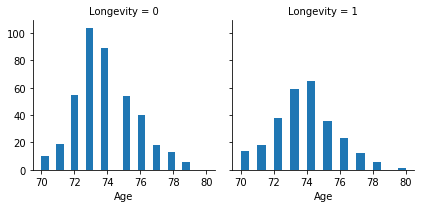

In [30]:
g = sns.FacetGrid(train_df, col='Longevity')
g.map(plt.hist, 'Age', bins=20)

In [26]:
 #Correct errors in Age column
train_df['Age'].unique()
test_df['Age'].unique()

array(['76', '73', nan, '75', '74', '71', '72', '77', '78', '70', '80',
       '#ЗНАЧ!'], dtype=object)

In [29]:
idmax = train_df['Age'].value_counts().idxmax()
train_df['Age'] = train_df['Age'].map(lambda v: idmax if v == '#ЗНАЧ!' else v).astype(float)
test_df['Age'] = train_df['Age'].map(lambda v: idmax if v == '#ЗНАЧ!' else v).astype(float)

In [31]:
#Change category to number
#dataset['КАТЕГОРИЯ'] = dataset['КАТЕГОРИЯ'].map( {'ЗНАЧЕНИЕ#1': 1, 'ЗНАЧЕНИЕ#2': 2, 'ЗНАЧЕНИЕ#3': 3} ).astype(int)

In [32]:
train_df.corr()

,Id,Longevity,Education,Age,Pet,Children,Activity
Id,1.000000,-0.004966,-0.036821,0.046844,-0.058978,-0.009969,0.030154
Longevity,-0.004966,1.000000,-0.332122,-0.067844,-0.032516,0.083514,0.258674
Education,-0.036821,-0.332122,1.000000,-0.367923,0.079293,0.008467,-0.555511
Age,0.046844,-0.067844,-0.367923,1.000000,-0.309838,-0.194627,0.085975
Pet,-0.058978,-0.032516,0.079293,-0.309838,1.000000,0.426704,0.156574
Children,-0.009969,0.083514,0.008467,-0.194627,0.426704,1.000000,0.218905
Activity,0.030154,0.258674,-0.555511,0.085975,0.156574,0.218905,1.000000


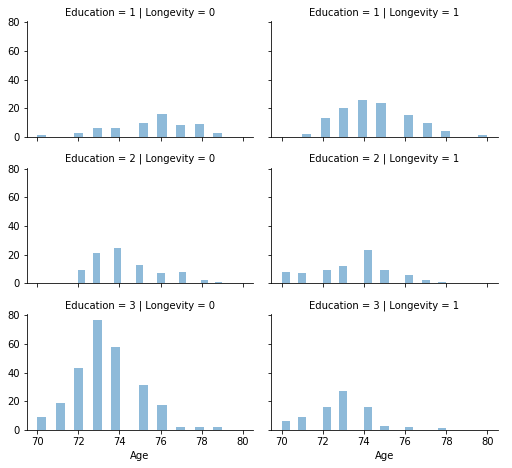

In [33]:
grid = sns.FacetGrid(train_df, col='Longevity', row='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/team02/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


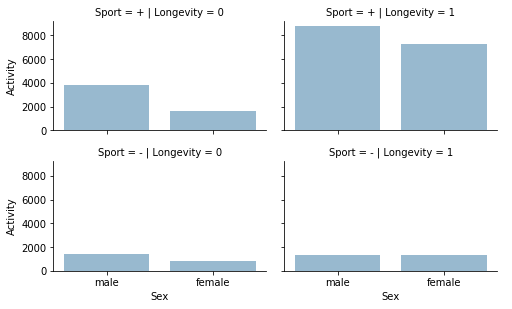

In [36]:
grid = sns.FacetGrid(train_df, row='Sport', col='Longevity', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Activity', alpha=.5, ci=None)
grid.add_legend()